# Data analysis on the data about student exam performance


The `exams.csv` dataset represents data about student exam performance for math, reading and writing, along with some factors about the students. 

Detailed column descriptions can be found at the [Kaggle page](https://www.kaggle.com/datasets/rkiattisak/student-performance-in-mathematics).

Pay attention to code style, chart styling (titles, axis labeling), commenting and usage of Markdown.

#### Project deadline: 10.04.2023 23:59

### Data cleaning and analysis
* Import the dataset
* Find out if the dataset has `NaN` values
  - if so, remove them
* How many entries of male/female students are in the dataset? Is it well balanced?
* Find out which variables need to be categorical, make them so
* Rename columns  
  * `test preparation course` to `testprep`
  * `parental level of education` to `parented`
  * `math score` to `math`
  * `reading score` to `reading`
  * `writing score` to `writing`
  
### Data visualization
* Visualize the share of each race/ethnicity in the total dataset
  * (Hint: use `autopct='%1.1f%%'` to display percentages)
* Visualize score ranges grouped by gender (which type of plot is best used for ranges?)
  * math
  * writing
  * reading
* Visualize the quantity of students of each race/ethnicity enroling in the test preparation course
  * (Hint: use crosstabulation)
* Use a scatterplot to visualize the distribution of reading and math scores, use red dots for male students, blue dots or female 
  * (Hint: Matplotlib does not allow plotting multiple groups at once, you will have to overlay two plots.)
* Visualize the ranges of math/writing/reading scores grouped by parents' education levels

Comment your conclusions about the dataset with each chart.

## Data cleaning and analysis

### Importing the dataset

In [1]:
import pandas as pd
df = pd.read_csv("exams.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86
...,...,...,...,...,...,...,...,...
995,male,group C,some college,standard,none,77,77,71
996,male,group C,some college,standard,none,80,66,66
997,female,group A,high school,standard,completed,67,86,86
998,male,group E,high school,standard,none,80,72,62


### Finding out if the dataset has NaN values

In [2]:
df.isna()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


###### There is no NaN values,but anyway dropping them if escaped from my eye.


In [3]:
df.dropna(axis = "index",how = "any" , inplace = True)
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86
...,...,...,...,...,...,...,...,...
995,male,group C,some college,standard,none,77,77,71
996,male,group C,some college,standard,none,80,66,66
997,female,group A,high school,standard,completed,67,86,86
998,male,group E,high school,standard,none,80,72,62


###### As I read the column descriptions on Kaggle, it says in the column "test preparation course",(Whether the student completed a test preparation course (yes/no),  "none" values mean the student does not  completed a test preparation. So I am changing "none" to " not completed" only in that column

In [4]:
df["test preparation course"].replace("none","not completed", inplace = True)
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,not completed,96,93,87
2,female,group D,some college,free/reduced,not completed,57,76,77
3,male,group B,some college,free/reduced,not completed,70,70,63
4,female,group D,associate's degree,standard,not completed,83,85,86
...,...,...,...,...,...,...,...,...
995,male,group C,some college,standard,not completed,77,77,71
996,male,group C,some college,standard,not completed,80,66,66
997,female,group A,high school,standard,completed,67,86,86
998,male,group E,high school,standard,not completed,80,72,62


### How many entries of male/female students are in the dataset? Is it well balanced?

In [5]:
df["gender"].value_counts()

male      508
female    492
Name: gender, dtype: int64

###### Male 508 , Female 492. The difference is tot very high so I think , yes, It is well balanced.

### Find out which variables need to be categorical, make them so

In [6]:
variables = [df["gender"],
             df["race/ethnicity"],
             df["parental level of education"],
             df["lunch"],
             df["test preparation course"]]
for i in variables:
    print(i.unique())

['female' 'male']
['group D' 'group B' 'group C' 'group E' 'group A']
['some college' "associate's degree" 'some high school'
 "bachelor's degree" "master's degree" 'high school']
['standard' 'free/reduced']
['completed' 'not completed']


###### In my oppinion these all could be seen as categorical variables in this dataframe ,so changing them all to Categorical type

In [7]:
df["gender"] = pd.Categorical(df["gender"])
df["race/ethnicity"] = pd.Categorical(df["race/ethnicity"])
df["parental level of education"] = pd.Categorical(df["parental level of education"])
df["lunch"] = pd.Categorical(df["lunch"])
df["test preparation course"] = pd.Categorical(df["test preparation course"])

### Rename columns

In [8]:
df.rename(columns = {"test preparation course":"testprep",
                     "parental level of education":"parented",
                     "math score":"math",
                     "reading score":"reading",
                     "writing score":"writing"},inplace = True)
df

,gender,race/ethnicity,parented,lunch,testprep,math,reading,writing
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,not completed,96,93,87
2,female,group D,some college,free/reduced,not completed,57,76,77
3,male,group B,some college,free/reduced,not completed,70,70,63
4,female,group D,associate's degree,standard,not completed,83,85,86
...,...,...,...,...,...,...,...,...
995,male,group C,some college,standard,not completed,77,77,71
996,male,group C,some college,standard,not completed,80,66,66
997,female,group A,high school,standard,completed,67,86,86
998,male,group E,high school,standard,not completed,80,72,62


## Data visualization

In [9]:
import matplotlib.pyplot as plt
df

,gender,race/ethnicity,parented,lunch,testprep,math,reading,writing
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,not completed,96,93,87
2,female,group D,some college,free/reduced,not completed,57,76,77
3,male,group B,some college,free/reduced,not completed,70,70,63
4,female,group D,associate's degree,standard,not completed,83,85,86
...,...,...,...,...,...,...,...,...
995,male,group C,some college,standard,not completed,77,77,71
996,male,group C,some college,standard,not completed,80,66,66
997,female,group A,high school,standard,completed,67,86,86
998,male,group E,high school,standard,not completed,80,72,62


### Visualize the share of each race/ethnicity in the total dataset

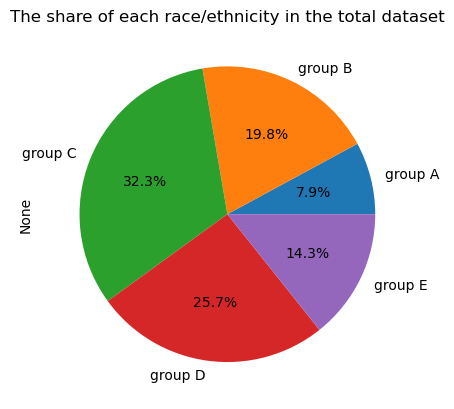

In [10]:
df.groupby("race/ethnicity").size().plot.pie(autopct='%1.1f%%')
plt.title("The share of each race/ethnicity in the total dataset")
plt.show()

###### 32,3% of students in our dataset are form Group C 
###### 25,7% are from Group D
###### 19,8% are from Group B
###### 14,4% are from Group E
###### 7,9% are from Group A

### Visualize score ranges grouped by gender 

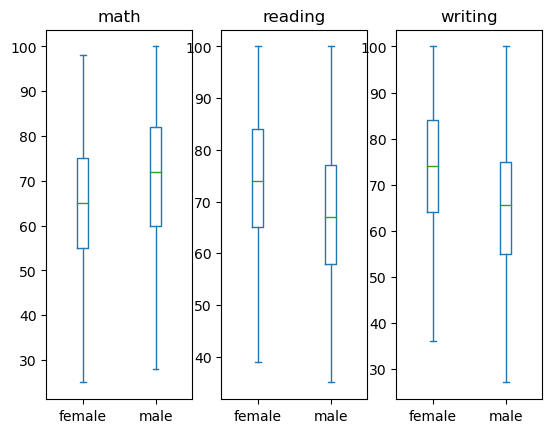

In [11]:
df.plot.box(column=["math","reading","writing"], by="gender", showfliers=False)
plt.show()

###### Male have average score of math in around 74
###### Femalehave average score of math in around 65
###### Male have average score of reading in around 67
###### Femalehave average score of reading  in around 75
###### Male have average score of writing in around 66
###### Femalehave average score of writing in around 75


### Visualize the quantity of students of each race/ethnicity enroling in the test preparation course

###### I don't really understand what it is required here ,because everyone has enrolled, some of them compleated, some of them not( "none" values), so I assumed to visualize the quantity of students of each race/ethnicity whether thay copleated or not in the test preparation course.

testprep,completed,not completed
race/ethnicity,,
group A,31,48
group B,66,132
group C,101,222
group D,97,160
group E,49,94


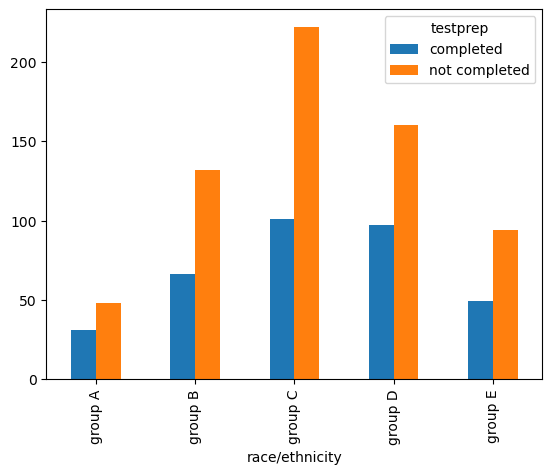

In [12]:
crosstab = pd.crosstab(df["race/ethnicity"], df["testprep"])
crosstab.plot.bar()

crosstab

###### In Group A 31 have compleated the course and 48 have not
###### In Group B 66 have compleated the course and 132 have not
###### In Group C 101 havecompleated the course and 222 have not
###### In Group D 97 have compleated the course and 160 have not
###### In Group E 49 have compleated the course and 94 have not

### Use a scatterplot to visualize the distribution of reading and math scores, use red dots for male students, blue dots or female

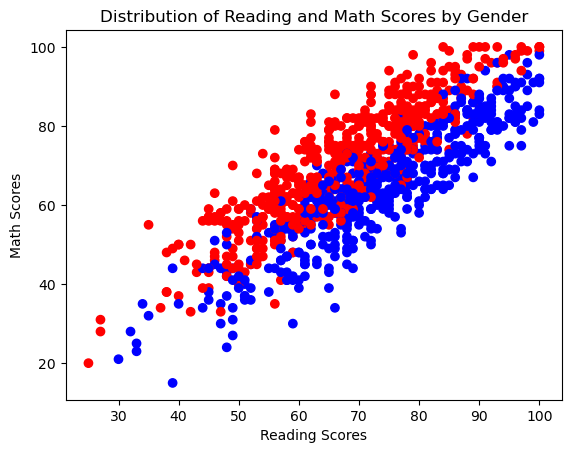

In [13]:
plt.scatter(x=df['reading'], y=df['math'], c=df['gender'].map({'male': 'red', 'female': 'blue'}))

plt.xlabel('Reading Scores')
plt.ylabel('Math Scores')
plt.title('Distribution of Reading and Math Scores by Gender')

plt.show()


###### The above Distribution shows that Male are good at math and Female are good at reading :D

### Visualize the ranges of math/writing/reading scores grouped by parents' education levels

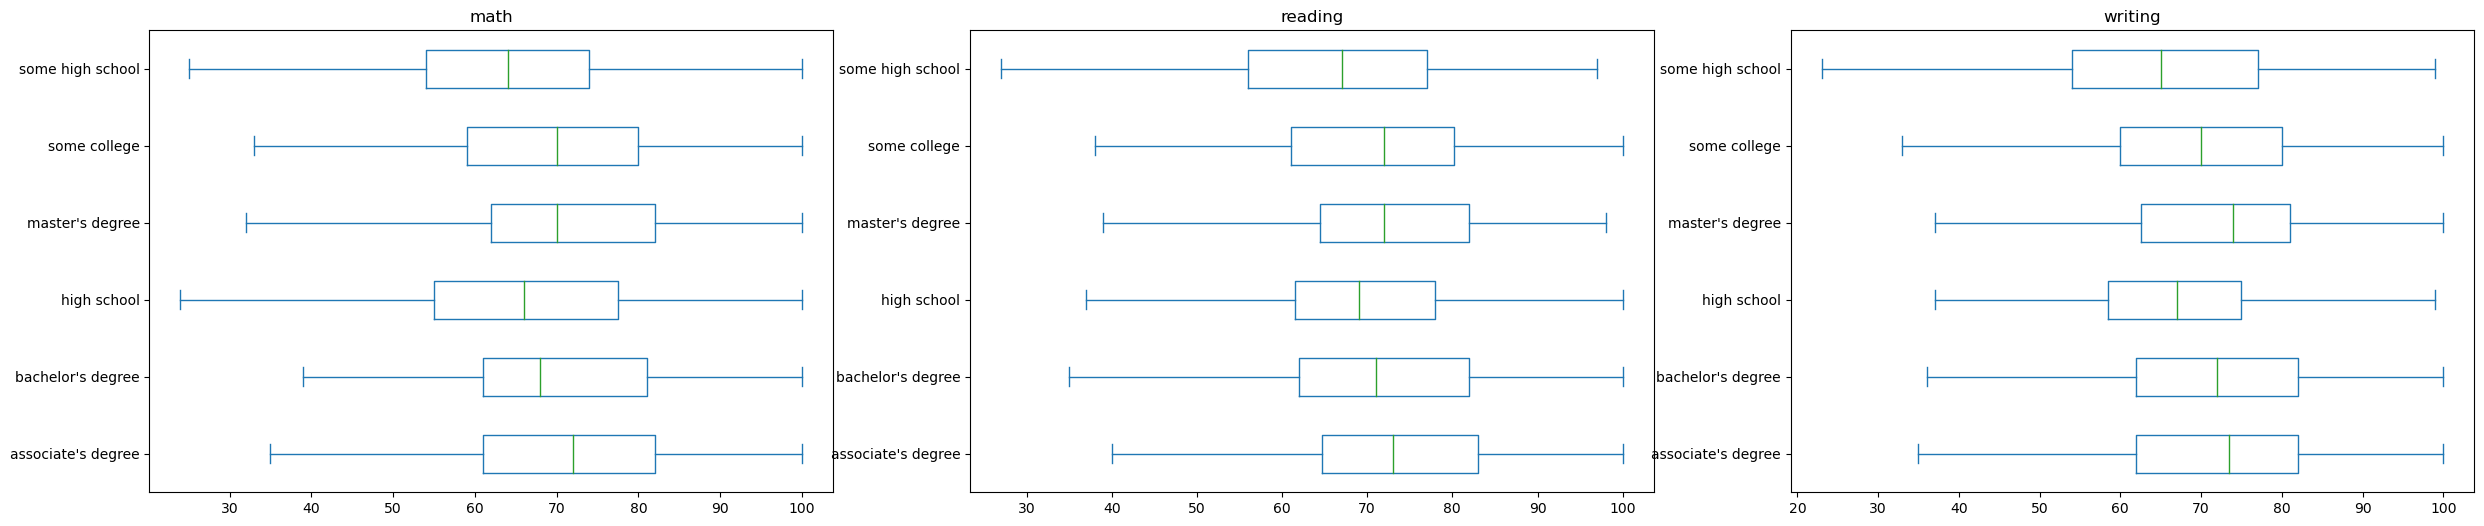

In [14]:
df.plot.box(column=["math","reading","writing"], by="parented", showfliers=False,vert=False)

fig = plt.gcf()
fig.set_size_inches(30, 6)


plt.show()


###### Sorry for inconvenience, if you double click on charts they will zoom in.
###### The boxplot shows that on average math scores were the highest when parent(s) had a associate's degree
###### The boxplot shows that on average reading scores were the highest when parent(s) had a associate's degree
###### The boxplot shows that on average writing scores were the highest when parents(s) had a master's degree

